In [1]:
using DrWatson

@quickactivate "GRNEvoContingency"

projectname()

"GRNEvoContingency"

In [2]:
using HomotopyContinuation
using Plots
using BenchmarkTools
using Symbolics
using LinearAlgebra

In [3]:
# const Nc = 100

# const tissue = range(0,1,length = Nc)

# const dx = step(tissue)

# const  λ_g = 0.05


# m(x) = 10*exp(-x/0.4)

# @var w[1:3, 1:4]  g[1:3, 1:Nc]

# @var d[1:3, 1:Nc]


# s(i, cell) = sum(w[i,k] * g[k, cell] for k in 1:3) + w[i, 4] * m(tissue[cell])


# function Δ(i, cell)
#   I = s(i, cell)
#   [
#     # d[j,i] = sqrt(I^2 + 1)
#     d[i, cell]^2 - (I^2 + 1)
#     # σ(s(i,j)) - λ_g g_j^{(i)}
#     0.5 * ((I / d[i, cell]) + 1) - λ_g * g[i, cell]
#   ]
# end

# function system()
#   System(reduce(vcat,[
#       [Δ(1,cell)
#       Δ(2,cell)
#       Δ(3,cell)] for cell in 1:Nc
#     ]);
#     variables=[vec(g); vec(d)],
#     parameters=[vec(w);])
# end


# Choose something sensible here

# Comment / Hint
# monodromy_solve choose random complex values for all parameters (from a normal distribution) (this is `q` above)
# If your real parameter values have a different scale, then you should probably move first the generic solutions `S`
# to a new set of random complex parameters of the same scale as your real parameters.


In [52]:
const Nc = 50

const tissue = range(0,1,length = Nc)

const dx = step(tissue)

const  λ_g = 0.05

const h_a = -1.
const h_b = 0.1

σ(I) = 0.5*(((I + h_a)/sqrt((I + h_a)^2+h_b)) + 1)

morph(x) = 10*exp(-x/0.4)

@var w[1:3, 1:4]  g[1:3], d[1:3], M

s(i) = sum(w[i,k] * g[k] for k in 1:3) + w[i, 4] * M

function Δ(i)
  I = s(i) + h_a
  [
    # d[j,i] = sqrt(I^2 + 1)
    d[i]^2 - (I^2 + h_b)
    # σ(s(i,j)) - λ_g g_j^{(i)}
    0.5 * ((I / d[i]) + 1) - λ_g * g[i]
  ]
end

function GRN()
  System(
      [Δ(1)
       Δ(2)
       Δ(3)];
    variables=[vec(g);vec(d)],
    parameters=[vec(w);M])
end


GRN (generic function with 1 method)

In [53]:
F = GRN()


System of length 6
 6 variables: g₁, g₂, g₃, d₁, d₂, d₃
 13 parameters: w₁₋₁, w₂₋₁, w₃₋₁, w₁₋₂, w₂₋₂, w₃₋₂, w₁₋₃, w₂₋₃, w₃₋₃, w₁₋₄, w₂₋₄, w₃₋₄, M

 -(0.1 + (-1.0 + M*w₁₋₄ + g₁*w₁₋₁ + g₂*w₁₋₂ + g₃*w₁₋₃)^2) + d₁^2
 -0.05*g₁ + 0.5*(1 + (-1.0 + M*w₁₋₄ + g₁*w₁₋₁ + g₂*w₁₋₂ + g₃*w₁₋₃)/d₁)
 -(0.1 + (-1.0 + M*w₂₋₄ + g₁*w₂₋₁ + g₂*w₂₋₂ + g₃*w₂₋₃)^2) + d₂^2
 -0.05*g₂ + 0.5*(1 + (-1.0 + M*w₂₋₄ + g₁*w₂₋₁ + g₂*w₂₋₂ + g₃*w₂₋₃)/d₂)
 -(0.1 + (-1.0 + M*w₃₋₄ + g₁*w₃₋₁ + g₂*w₃₋₂ + g₃*w₃₋₃)^2) + d₃^2
 -0.05*g₃ + 0.5*(1 + (-1.0 + M*w₃₋₄ + g₁*w₃₋₁ + g₂*w₃₋₂ + g₃*w₃₋₃)/d₃)

In [54]:
# S = solve(F, target_parameters = weights);

In [55]:
r = monodromy_solve(F)

S = solutions(r)
q = parameters(r);

In [56]:
# @variables g1,g2,g3,m

# @variables w11,w12,w13,w21,w22,w23,w31,w32,w33

# @variables w1m,w2m,w3m


# # g1_f(g1,g2,g3) = 0.5*(((w11*g1 + w12*g2 + w13*g3 + w1m*m)/sqrt((w11*g1 + w12*g2 + w13*g3 + w1m*m)^2 + 1)) + 1) - λ_g*g1
# # g2_f(g1,g2,g3) = 0.5*(((w21*g1 + w22*g2 + w23*g3 + w2m*m)/sqrt((w21*g1 + w22*g2 + w23*g3 + w2m*m)^2 + 1)) + 1) - λ_g*g2
# # g3_f(g1,g2,g3) = 0.5*(((w31*g1 + w32*g2 + w33*g3 + w3m*m)/sqrt((w31*g1 + w32*g2 + w33*g3 + w3m*m)^2 + 1)) + 1) - λ_g*g3

# g1_f(g1,g2,g3) = σ(w11*g1 + w12*g2 + w13*g3 + w1m*m) - λ_g*g1
# g2_f(g1,g2,g3) = σ(w21*g1 + w22*g2 + w23*g3 + w2m*m) - λ_g*g2
# g3_f(g1,g2,g3) = σ(w31*g1 + w32*g2 + w33*g3 + w3m*m) - λ_g*g3

# J = Symbolics.jacobian([g1_f(g1,g2,g3), g2_f(g1,g2,g3),g3_f(g1,g2,g3) ], [g1,g2,g3])

# J_call = eval(Symbolics.build_function(J,[g1,g2,g3,w11, w21, w31, w12, w22, w32, w13, w23, w33, w1m, w2m, w3m, m])[1])


@variables G[1:3],M

@variables W[1:3,1:4]

g_sum(i) = sum(W[i,k] * G[k] for k in 1:3) + W[i, 4] * M

g_delta(i) = σ(g_sum(i)) - λ_g*G[i]

J = Symbolics.jacobian([g_delta(1),g_delta(2),g_delta(3)], G)

J_call = eval(Symbolics.build_function(J,[G;vec(W); M])[1])

#147 (generic function with 1 method)

In [57]:
function satisfies_system(G,p)

    G1 = G[1]
    G2 = G[2]
    G3 = G[3]

    w11, w21, w31, w12, w22, w32, w13, w23, w33, w1m, w2m, w3m, M = p

    r1 = σ(w11*G1 + w12*G2 + w13*G3 + w1m*M) - λ_g*G1
    r2 = σ(w21*G1 + w22*G2 + w23*G3 + w2m*M) - λ_g*G2
    r3 = σ(w31*G1 + w32*G2 + w33*G3 + w3m*M) - λ_g*G3

    eig = J_call([G1,G2,G3,w11, w21, w31, w12, w22, w32, w13, w23, w33, w1m, w2m, w3m, M])

    return all(abs.([r1,r2,r3]) .< 1e-11) && all(real.(eigvals(eig)) .< 0)
end

function eig_sys(G,p)

    G1 = G[1]
    G2 = G[2]
    G3 = G[3]

    w11, w21, w31, w12, w22, w32, w13, w23, w33, w1m, w2m, w3m, λ_g, M = p

    eig = J_call([G1,G2,G3,w11, w21, w31, w12, w22, w32, w13, w23, w33, w1m, w2m, w3m, M])

    return eigvals(eig)
end

function zero_sys(G,p)

    G1 = G[1]
    G2 = G[2]
    G3 = G[3]

    w11, w21, w31, w12, w22, w32, w13, w23, w33, w1m, w2m, w3m, M = p

    r1 = σ(w11*G1 + w12*G2 + w13*G3 + w1m*M) - λ_g*G1
    r2 = σ(w21*G1 + w22*G2 + w23*G3 + w2m*M) - λ_g*G2
    r3 = σ(w31*G1 + w32*G2 + w33*G3 + w3m*M) - λ_g*G3

    return abs.([r1,r2,r3])
end

zero_sys (generic function with 1 method)

In [58]:
function get_valid_solutions(r,p)
    rp = filter(s -> all(s .> 0), real_solutions(r))
    rpv = filter(x->satisfies_system(x,p),rp)
    return rpv
end

function get_pos_real_solutions(r)
    return filter(s -> all(s .> 0), real_solutions(r))
end

get_pos_real_solutions (generic function with 1 method)

In [59]:
example_networks = load(datadir("exp_pro/80-40-80_networks/examples.jld"))

Dict{String, Any} with 6 entries:
  "bistable"     => NaN
  "feed_forward" => [0.0 0.0 0.0 0.19495; 0.173532 0.0 0.0 0.0; 3.02262 -5.5322…
  "classical"    => [0.0 0.0 0.0 0.114353; -0.560775 0.359711 0.0 0.0; -0.07258…
  "frozen_osc"   => NaN
  "mutual_inh"   => [0.0 0.0 0.0 0.2454; 0.455819 0.0 -2.23319 0.0; 0.446651 -2…
  "overlap_dom"  => [0.0 0.0 -0.00379469 0.228214; 0.653415 0.0 0.0 0.0; -0.424…

In [131]:
w_ex = rand(3,4)

w_ex[2,4] = 0.
w_ex[3,4] = 0.

# w_ex = [ 0.567407  -1.40317     -0.171388  1.51779;
#  0.0        0.00521438   0.0       0.0;
#  0.166203  -0.71488      0.0       0.0]

w_ex = example_networks["feed_forward"]

weights = w_ex[:];

P = [[weights...,morph(x)] for x in tissue];

In [132]:
data_points = solve(F, S; start_parameters=q, target_parameters=P,transform_result = (r,p) ->get_valid_solutions(r,p));

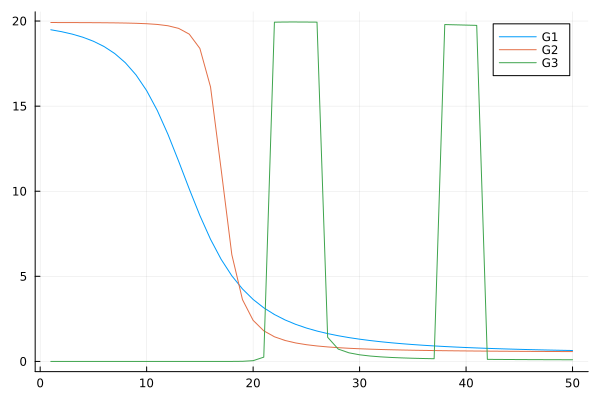

In [135]:
d1 = map(y->y[1],filter(x->length(x) > 0,data_points))

plot(map(x->x[1],d1),label = "G1")
plot!(map(x->x[2],d1),label = "G2")
plot!(map(x->x[3],d1),label = "G3")

In [136]:
# @benchmark solve(F, S; start_parameters=q, target_parameters=P,transform_result = (r,p) ->get_valid_solutions(r,p),threading = false)

In [143]:
weights_mut = w_ex[:];

weights_mut[rand(1:length(weights_mut)-1)] += randn()

P_mut = [[weights_mut...,morph(x)] for x in tissue];

In [146]:
data_points = solve(F, S; start_parameters=q, target_parameters=P_mut,transform_result = (r,p) ->get_valid_solutions(r,p));

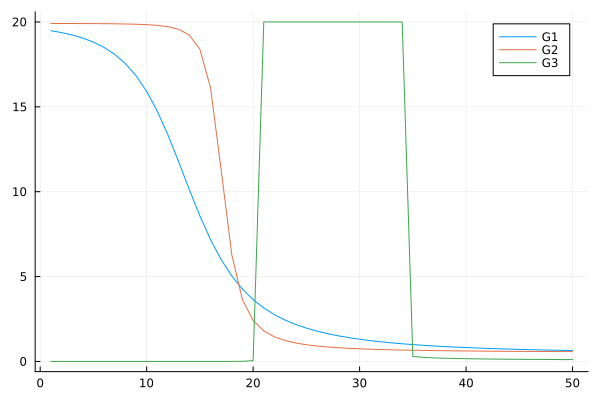

In [147]:
d1 = map(y->y[1],filter(x->length(x) > 0,data_points))

plot(map(x->x[1],d1),label = "G1")
plot!(map(x->x[2],d1),label = "G2")
plot!(map(x->x[3],d1),label = "G3")

In [118]:
@benchmark solve(F, S; start_parameters=q, target_parameters=P_mut,transform_result = (r,p) ->get_valid_solutions(r,p))

BenchmarkTools.Trial: 27 samples with 1 evaluation.
 Range (min … max):  185.985 ms … 197.660 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     190.831 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   191.015 ms ±   2.767 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

                 █▃  ▃        ▃▃   ▃               ▃             
  ▇▁▁▁▁▁▇▁▁▇▁▁▁▁▇██▇▁█▇▁▁▁▁▇▁▁██▇▁▁█▁▁▁▁▇▁▇▁▁▁▁▁▇▁▁█▁▁▁▁▁▁▁▁▁▁▇ ▁
  186 ms           Histogram: frequency by time          198 ms <

 Memory estimate: 6.86 MiB, allocs estimate: 110136.